<p>Developing models that will predict the price of the car using the variables or features.</p>                                    

 Importing libraries:


In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3-y
#! mamba install numpy=1.21.2-y
#! mamba install sklearn=0.20.1-y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
%pip install seaborn 

In [4]:
import seaborn as sns
%matplotlib inline 

In [5]:
df = pd.read_csv('cleaned_auto.csv', index_col=0)
df.reset_index(drop=True, inplace=True)
df.head(5)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std.1,aspiration-turbo.1,aspiration-std.2,aspiration-turbo.2
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,11.190476,Low,0,1,1,0,1,0,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,11.190476,Low,0,1,1,0,1,0,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,12.368421,Medium,0,1,1,0,1,0,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,9.791667,Low,0,1,1,0,1,0,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,13.055556,Low,0,1,1,0,1,0,1,0


 ##### Predicting car price by "engine-size"


In [ ]:
Creating a linear regression object called "lm1"

In [13]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [ ]:
Training the model using "engine-size" as the independent variable and "price" as the dependent variable

In [14]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [15]:
# Finding Slope 
lm1.coef_

array([[166.86001569]])

In [16]:
# Finding Intercept
lm1.intercept_

array([-7963.33890628])

In [ ]:
Equation of the predicted line

In [ ]:
# using X and Y
# Yhat = a + b  X
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*engine-size

<p>From the previous section  we know that some good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>


Developing a Multiple Linear Regression model using these variables as the predictor variables.


In [18]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fitting the linear model.


In [19]:
lm.fit(Z, df['price'])

LinearRegression()

Value of the intercept(a)


In [20]:
lm.intercept_

-14385.634549360093

Values of the coefficients (b1, b2, b3, b4)


In [21]:
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4

<b>Price</b> = -14385.634549360093 + 36.6377371 x <b>horsepower</b> + 3.50038215 x <b>curb-weight</b> + 85.37370862 x <b>engine-size</b> + 500.51979785 x <b>highway-mpg</b>


Creating and training another Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and  "highway-mpg".


In [22]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [23]:
# Finding the coefficient of the model 
lm2.coef_

array([-2.86467994e+00,  3.46770737e+03])

In [24]:
# Finding the intercept of the model
lm.intercept_

-14385.634549360093

 Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
 
 <b>Price</b> = -14385.634549360093 + -2.86467994e+00 x <b>normalized-losses</b> + 3.46770737e+03 x <b>highway-mpg</b> 


Visualizing **engine-size** as a potential predictor variable of price as a Regression Plot to evaluate the model


(0.0, 53033.0000419792)

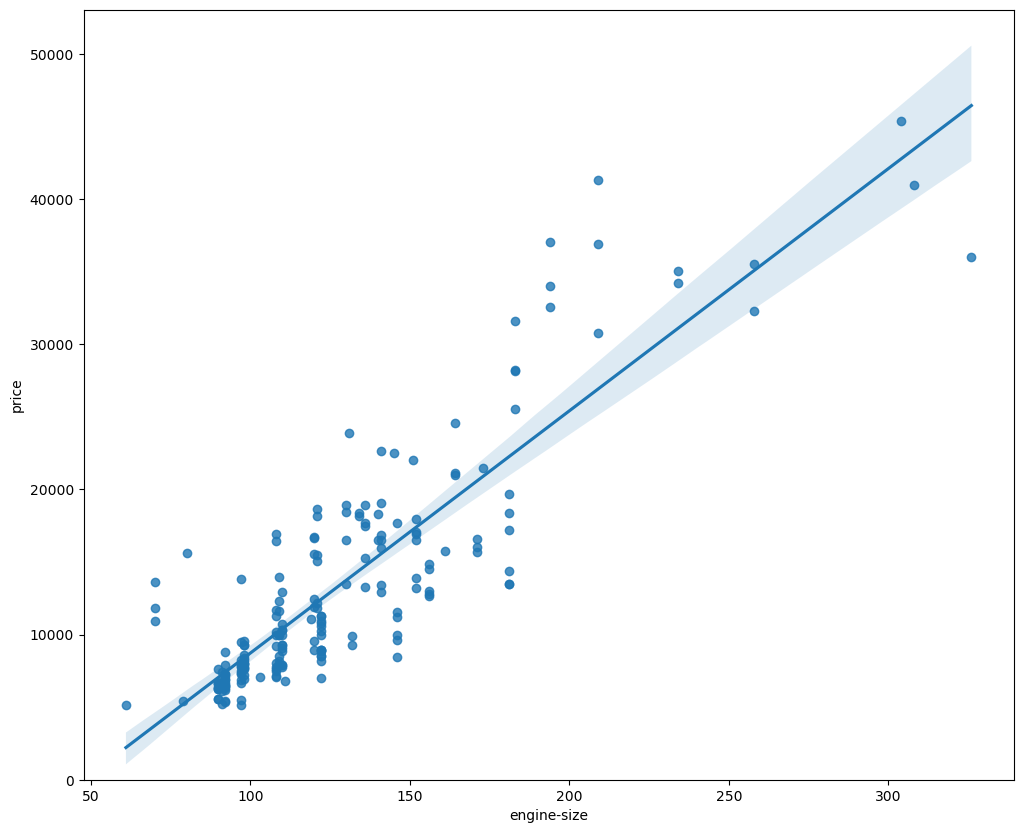

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is positively correlated to engine-size since the regression slope is positive.
I want to compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

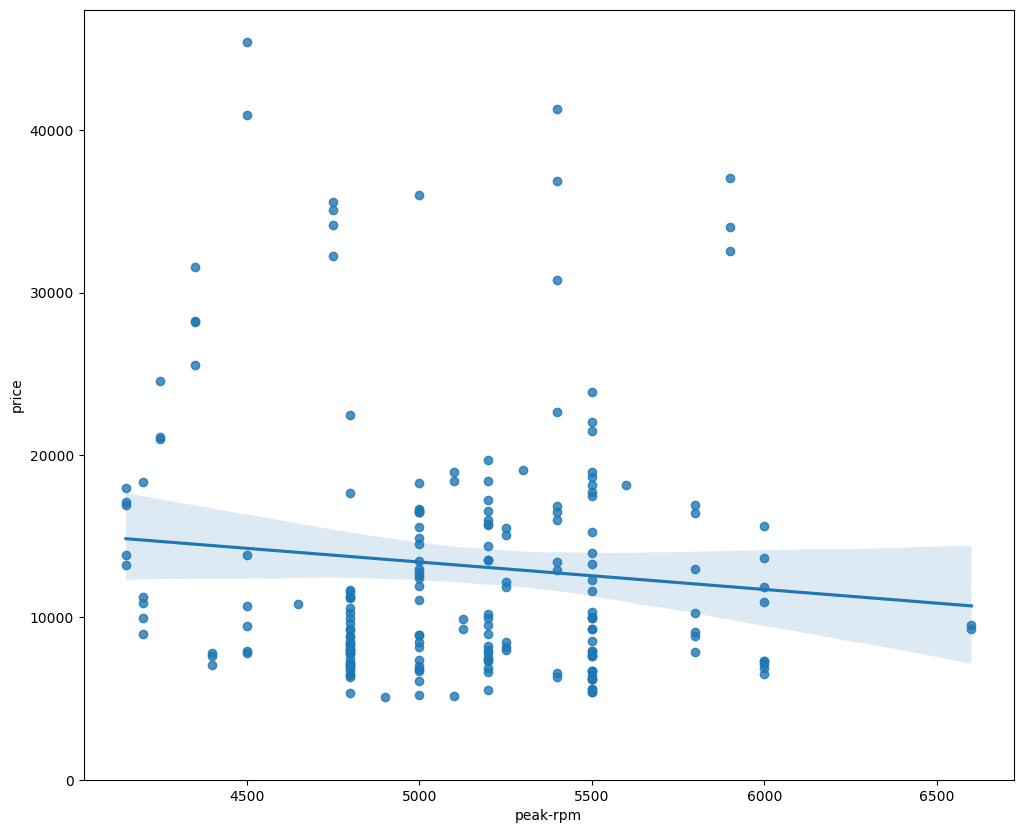

In [26]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "engine-size", we see that the points for "engine-size" are much closer to the generated line and, on average, increase. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>


In [28]:
 df[["peak-rpm","engine-size","price"]].corr()

,peak-rpm,engine-size,price
peak-rpm,1.000000,-0.256733,-0.101616
engine-size,-0.256733,1.000000,0.872335
price,-0.101616,0.872335,1.000000


The variable "engine-size" has a stronger correlation with "price", it is 
approximate 0.872335  compared to "peak-rpm" which is approximately -0.101616.



Creating a residual plot



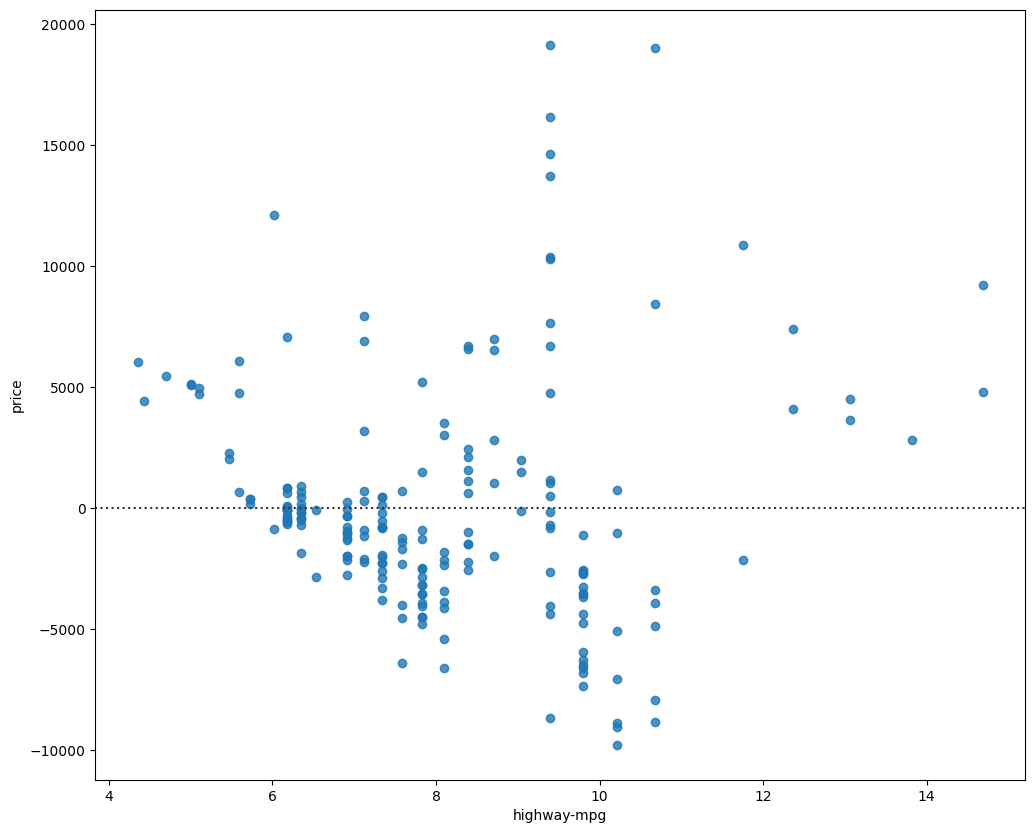

In [30]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.</p>




<p>Multiple Linear Regression-Comparing the distribution of the fitted values that result from the model to the distribution of the actual values.</p>


In [31]:
Y_hat = lm.predict(Z)

<ipython-input-32-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-32-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

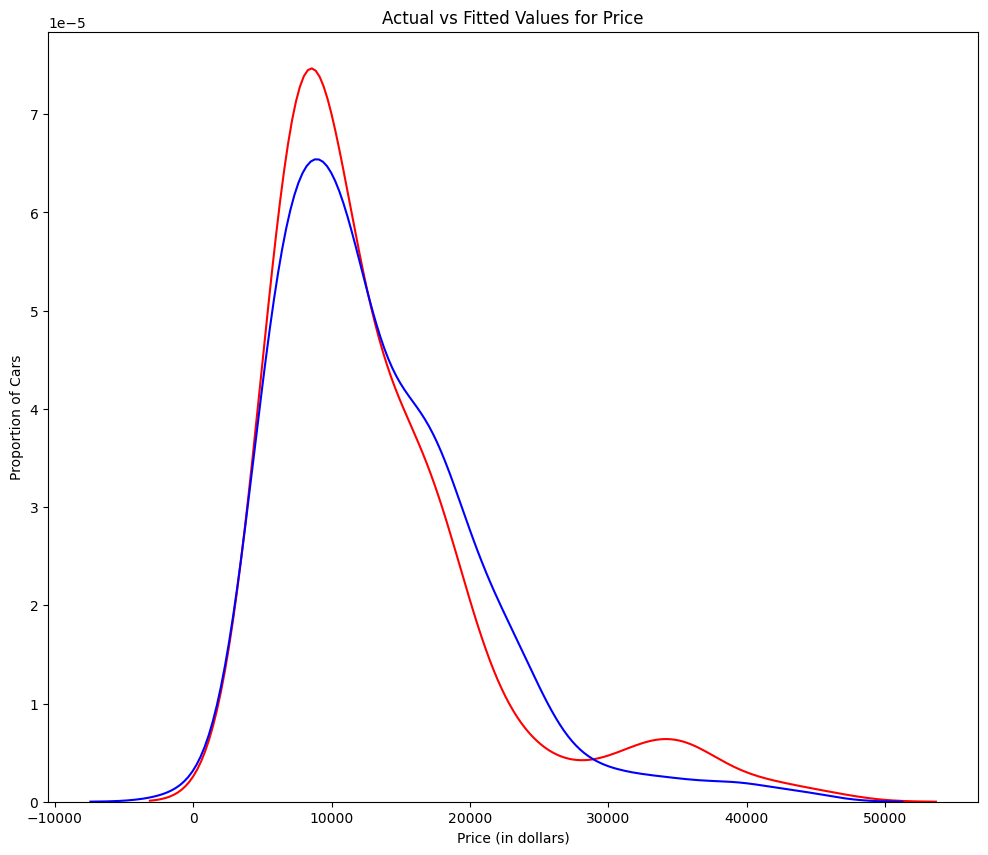

In [32]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit.</p>


Creating a polynomial regression model


In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Getting the variables


In [41]:
x = df['engine-size']
y = df['price']

Fitting the polynomial using the function <b>polyfit</b>, then using the function <b>poly1d</b> to display the polynomial function.


In [42]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3         2
-0.006641 x + 3.645 x - 433.4 x + 2.208e+04


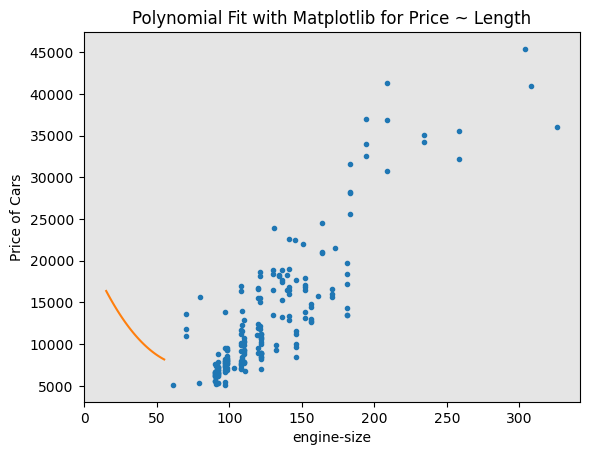

In [43]:
PlotPolly(p, x, y, 'engine-size')

In [44]:
np.polyfit(x, y, 3)

array([-6.64112463e-03,  3.64536744e+00, -4.33383781e+02,  2.20846740e+04])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


            11             10             9             8             7
-1.244e-18 x  + 3.136e-15 x  - 3.329e-12 x + 1.985e-09 x - 7.416e-07 x
              6           5         4         3            2
 + 0.0001823 x - 0.03004 x + 3.302 x - 235.8 x + 1.03e+04 x - 2.427e+05 x + 2.257e+06


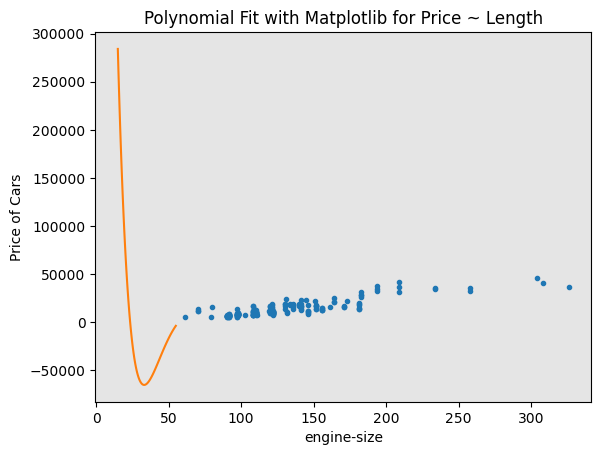

In [45]:
# Using a polynomial of the 11rd order (cubic) to create a model
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'engine-size')

Importing PolynomialFeatures module


In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [48]:
Z_pr=pr.fit_transform(Z)

In [49]:
Z.shape

(201, 4)

In the original data, there are 201 samples and 4 features.


In [50]:
Z_pr.shape

(201, 15)

After the transformation, there are 201 samples and 15 features.


##### Creating pipeline


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creating a list of tuples.


In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [53]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Converting the data type Z to type float and fitting the model. 


In [54]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Normalizing the data, performing a transform, and producing a prediction.


In [55]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

Now I want to Evaluate models by Measures


Model 1: Simple Linear Regression


In [74]:
#engine_size_fit
#calculating the R^2
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6417894513258817


We can say that ~64.178% of the variation of the price is explained by this simple linear model "engine_size_fit".


Calculating the MSE


In [60]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [15485.52737455 15485.52737455 16643.34931414 12475.19033163]


Importing the function <b>mean_squared_error</b> from the module <b>metrics</b>


In [61]:
from sklearn.metrics import mean_squared_error

Comparing the predicted results with the actual results:


In [62]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.77708523


Model 2: Multiple Linear Regression


Calculating the R^2:


In [63]:
# fitting the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8118115615344751


We can say that ~81.181 % of the variation of price is explained by this multiple linear regression "multi_fit".


Calculating the MSE


Producing a prediction


In [64]:
Y_predict_multifit = lm.predict(Z)

Comparing the predicted results with the actual results


In [65]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11826072.95653208


Model 3: Polynomial Fit


Calculating the R^2.


Importing the function r2_score from the module metrics.


In [66]:
from sklearn.metrics import r2_score

In [67]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7901519931574332


We can say that ~79.015 % of the variation of price is explained by this polynomial fit.


Calculating the MSE


In [68]:
mean_squared_error(df['price'], p(x))

13187196.08355573



<p>After training the model using the method fit, we will produce a prediction. Importing pyplot for plotting.</p>


In [69]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [70]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fitting the model


In [71]:
lm.fit(X, Y)
lm

LinearRegression()

Producing a prediction:


In [72]:
yhat=lm.predict(new_input)
yhat[0:5]

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-11159.15794152,  -7700.47282838,  -4241.78771523,   -783.10260209,
         2675.58251105])

Plotting the data


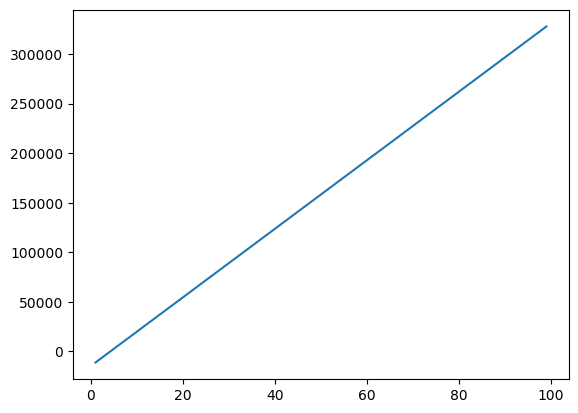

In [73]:
plt.plot(new_input, yhat)
plt.show()

Determining a Good Model Fit

<p>Simple Linear Regression: Using engine-size as as a Predictor Variable of Price.
<ul>
    <li>R-square0.6417894513258817759</li>
    <li>MS22510543.777085230^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-square0.8118115615344751497</li>
    <li>MS11826072.956532080^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Usiengine-sizempg as a Predictor Variable of Price.
<ul>
    <li>R-square0.7901519931574332514</li>
    <li>MS13187196.083555730^7</li>
</ul>
</p>


<h2>Conclusion</h2>


<p>Comparing these three models, we conclude that <b>the Multiple Linear Regression model is the best model</b> to be able to predict price from our dataset, because it has a higher R-squared value and the smallest MSE value. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.</p>
